In [2]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(0, 255)):
    """
    Calculate directional gradient
    Apply threshold
    
    Arguments:
        image - grayscale or otherwise single channel image
        orient - 'x' or 'y', determines which derivative to take.
        sobel_kernel - integer for kernel size
        thresh - tuple with a lower and an upper threshold; integer values 0-255.
    
    Returns:
        Thesholded image
    """
    # Calculate the derivative in the x-direction (the 1, 0 at the end denotes x-direction):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    # Calculate the derivative in the y-direction (the 0, 1 at the end denotes y-direction):
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

    if(orient == 'x'):
        sobel = sobelx
    else:
        sobel = sobely
        
    # Calculate the absolute value of the x-derivative:    
    abs_sobel = np.absolute(sobel)
    #Convert the absolute value image to 8-bit:
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))

    thresh_min = thresh[0]
    thresh_max = thresh[1]
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    return grad_binary

def mag_thresh(image, sobel_kernel=3, thresh=(30, 150)):
    """
    Calculate gradient magnitude
    Apply threshold
    
    Arguments:
        image - grayscale or otherwise single channel image
        sobel_kernel - integer for kernel size
        thresh - tuple with a lower and an upper threshold; integer values 0-255.
    
    Returns:
        Thesholded image
    """
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    sobelxy = np.sqrt(sobelx**2 + sobely**2)
    
    abs_sobelxy = np.absolute(sobelxy)
    
    scaled_sobel = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    
    thresh_min = thresh[0]
    thresh_max = thresh[1]
    mag_binary = np.zeros_like(scaled_sobel)
    mag_binary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    return mag_binary

def dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.2)):
    """
    Calculate gradient direction
    Apply threshold
    
    Arguments:
        image - grayscale or otherwise single channel image
        sobel_kernel - integer for kernel size
        mag_thresh - tuple with a lower and an upper threshold; values 0-2pi.
    
    Returns:
        Thesholded image
    """
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    direction = np.arctan2(abs_sobely,abs_sobelx)
    dir_binary = np.zeros_like(direction)
    dir_binary[(direction >= thresh[0]) & (direction <= thresh[1])] = 1
    
    return dir_binary



# HLS

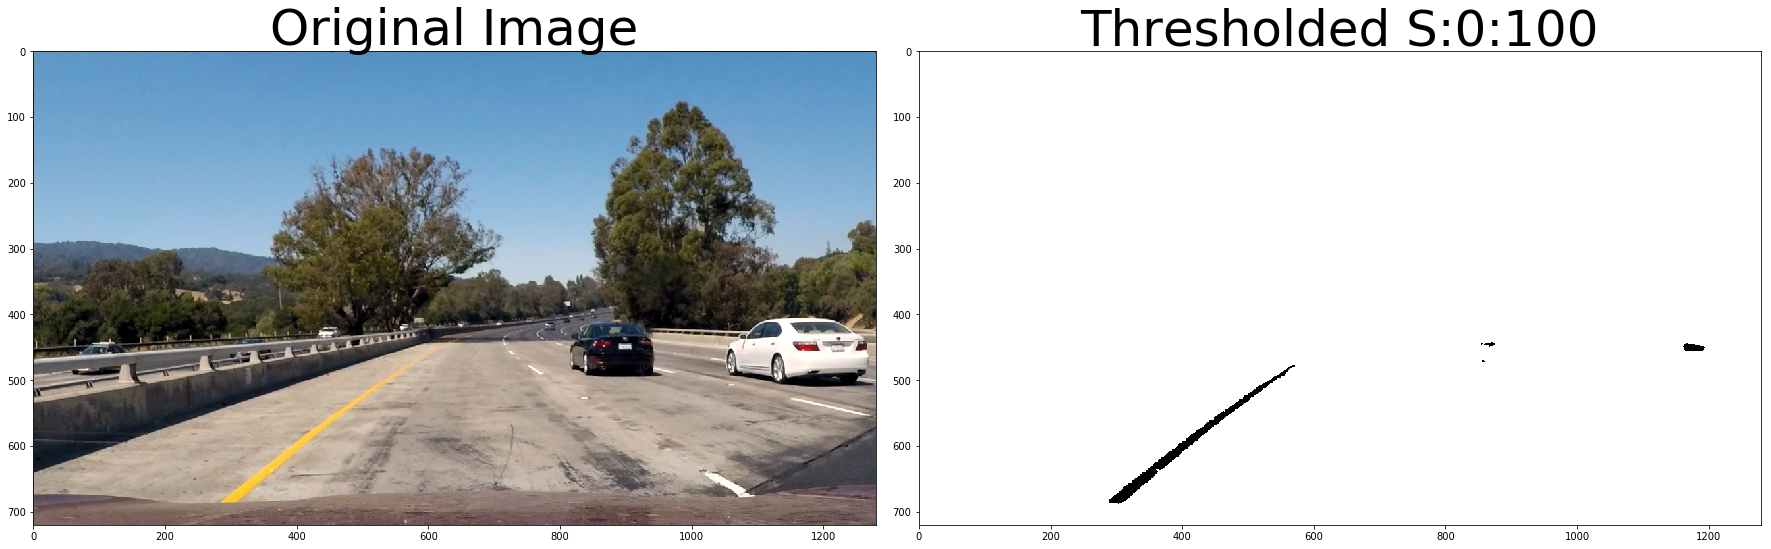

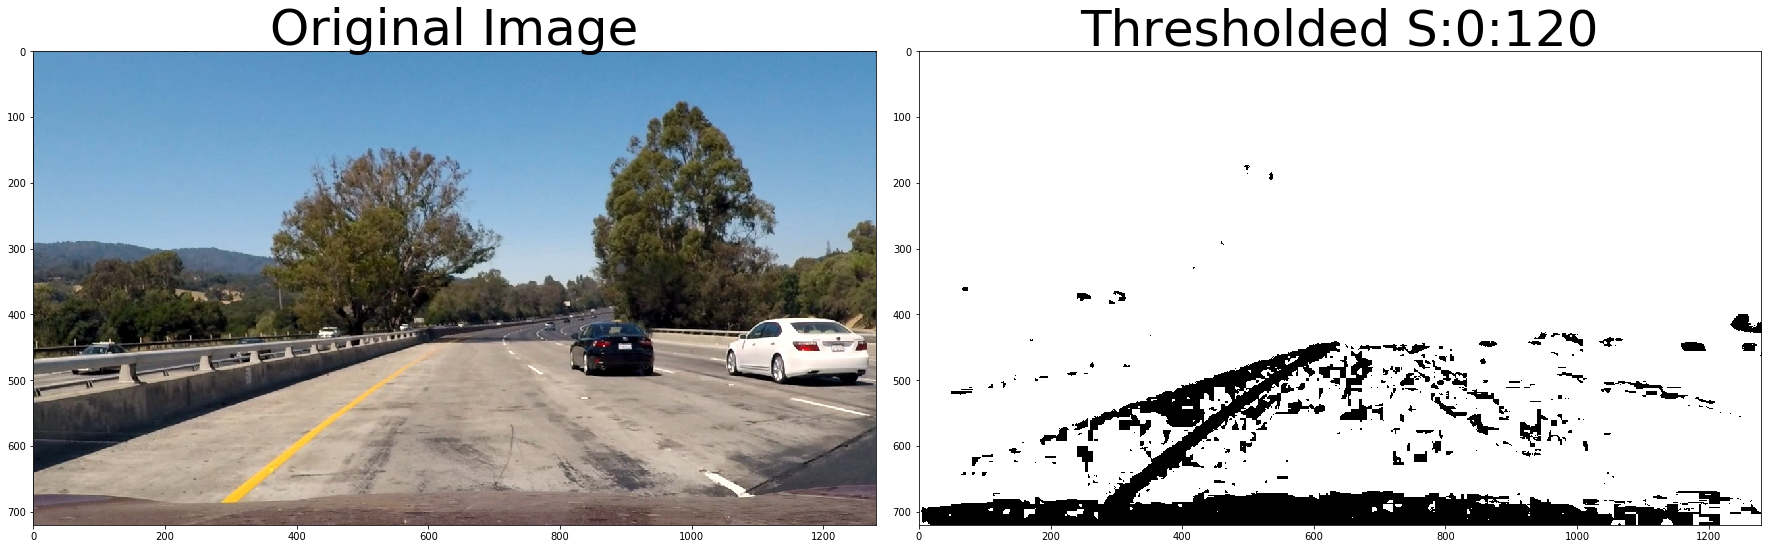

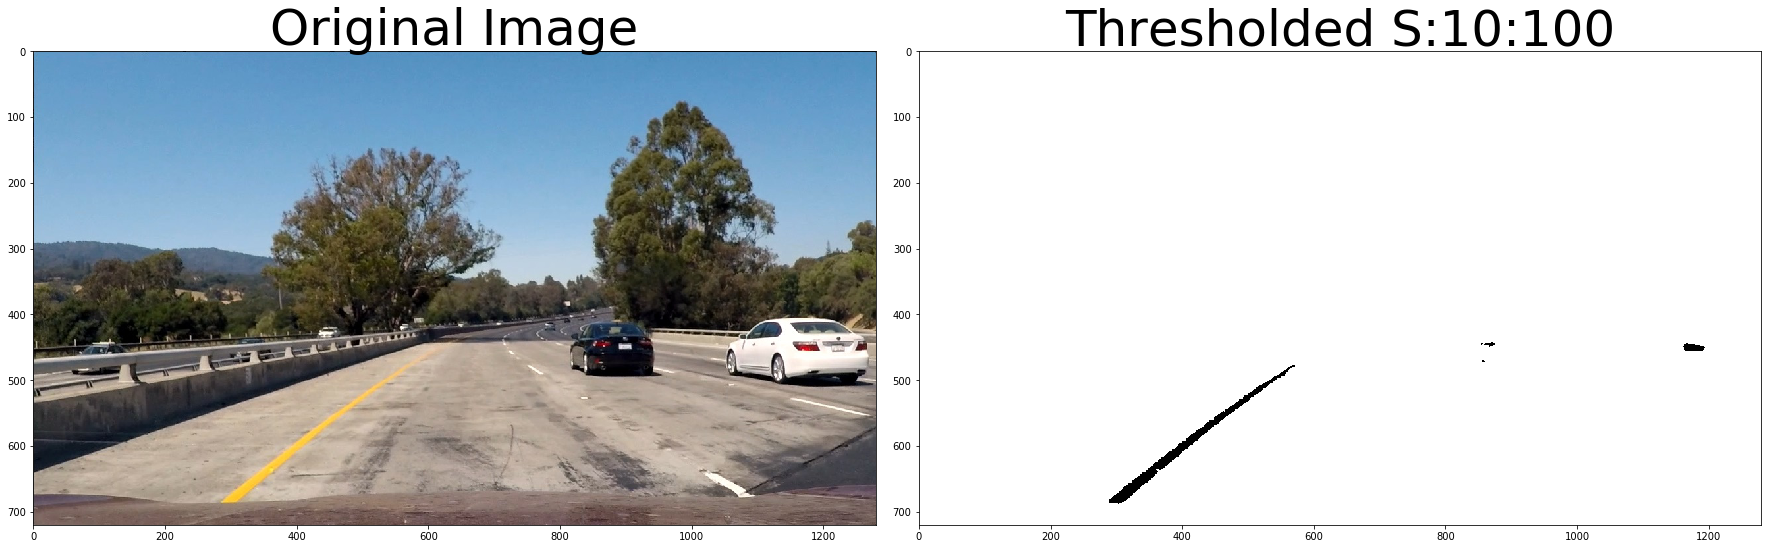

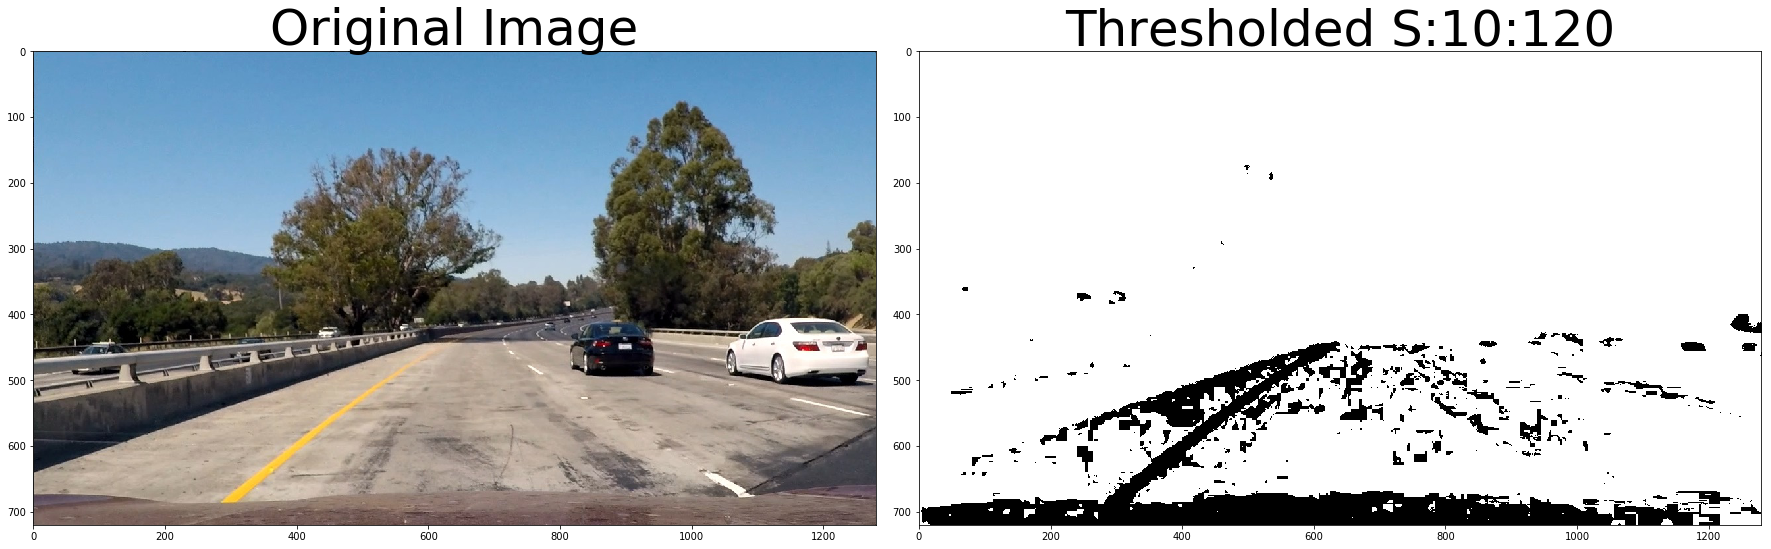

In [76]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import numpy as np
import cv2
from itertools import product
%matplotlib inline

def hls_select(image, thresh=None):
    """
    1) Convert an image to HLS color space
    2) If thresh is provided,
       apply a threshold to the S channel using the tuple thresh
    
    Returns a binary image or the saturation channel.
    """
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    S = hls[:,:,2]
    if thresh == None:
        return S
    # 2) Apply a threshold to the S channel
    binary = np.zeros_like(S)
    binary[(S <= thresh[0]) | (S > thresh[1])] = 1
    # 3) Return a binary image of threshold result
    return binary

def LUV_select(image, thresh=None):
    """
    1) Convert an image to HLS color space
    2) If thresh is provided,
       apply a threshold to the S channel using the tuple thresh
    
    Returns a binary image or the saturation channel.
    """
    # 1) Convert to LUV color space
    LUV = cv2.cvtColor(image, cv2.COLOR_BGR2LUV)
    V = LUV[:,:,2]
    if thresh == None:
        return V
    # 2) Apply a threshold to the V channel
    binary = np.zeros_like(V)
    binary[(V <= thresh[0]) | (V > thresh[1])] = 1
    # 3) Return a binary image of threshold result
    return binary

def LUV_select(image, thresh=None):
    """
    1) Convert an image to HLS color space
    2) If thresh is provided,
       apply a threshold to the S channel using the tuple thresh
    
    Returns a binary image or the saturation channel.
    """
    # 1) Convert to LUV color space
    LUV = cv2.cvtColor(image, cv2.COLOR_BGR2LUV)
    V = LUV[:,:,2]
    if thresh == None:
        return V
    # 2) Apply a threshold to the V channel
    binary = np.zeros_like(V)
    binary[(V <= thresh[0]) | (V > thresh[1])] = 1
    # 3) Return a binary image of threshold result
    return binary


# Read in an image
image = mpimg.imread('../test_images/test1.jpg') 

# Plot the result
# After much trial and error, I determined 0 and 120 to be ok thresholds.
# But I also decided not to apply a threshold to the S_Channel before apply convolutions.
lowers = [0, 10]
uppers = [100, 120]
for (low,high) in product(lowers,uppers):
    hls_binary = LUV_select(image, thresh=(low,high))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(hls_binary, cmap='gray')
    ax2.set_title('Thresholded S:%d:%d' % (low, high), fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Other Color Spaces

After comparing HLS to other spaces side by side, I found that the S channel was far superior for this application.

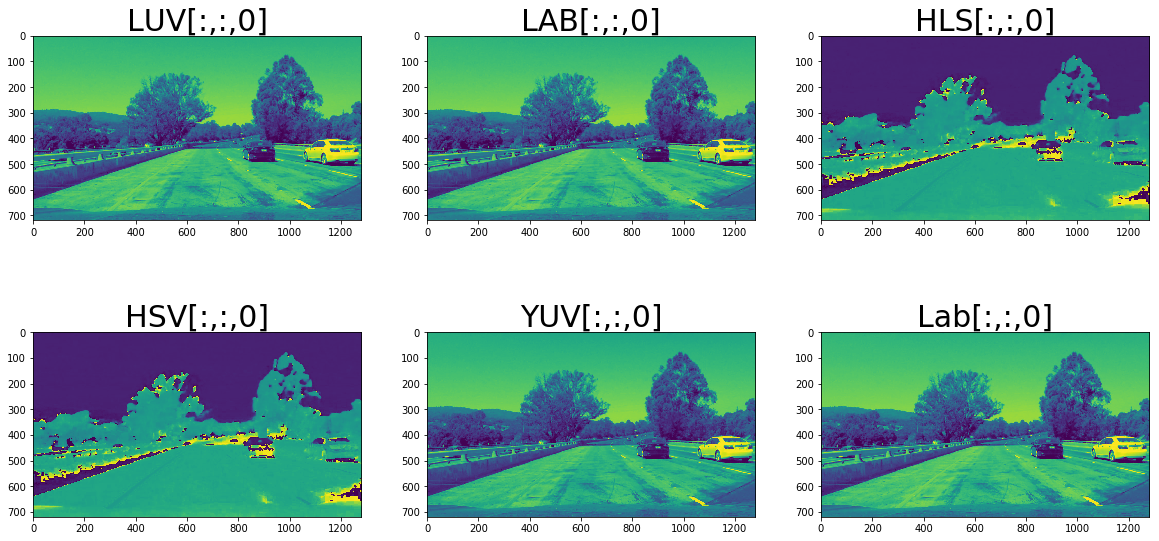

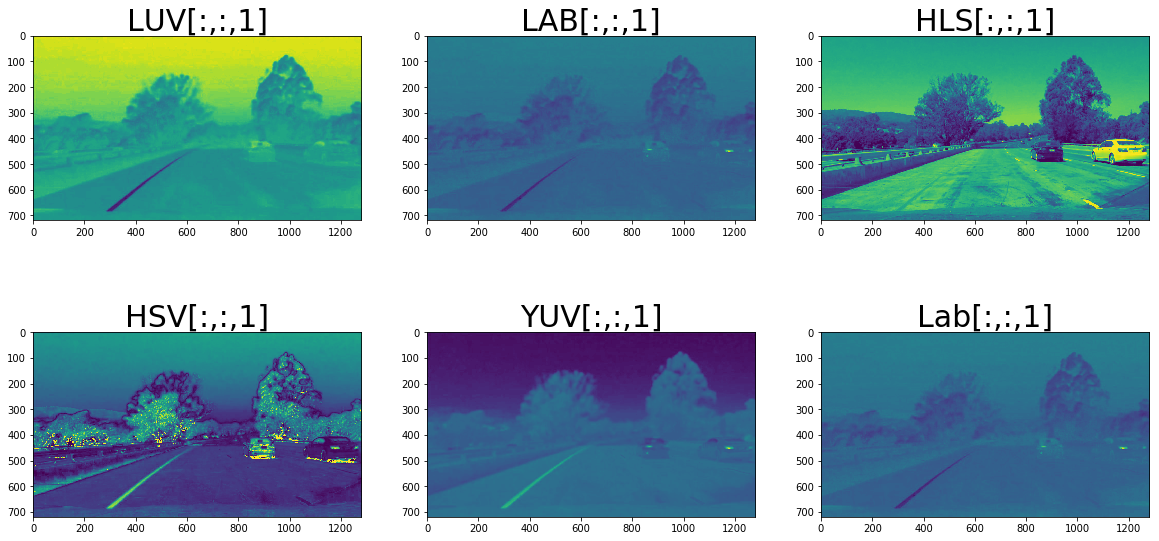

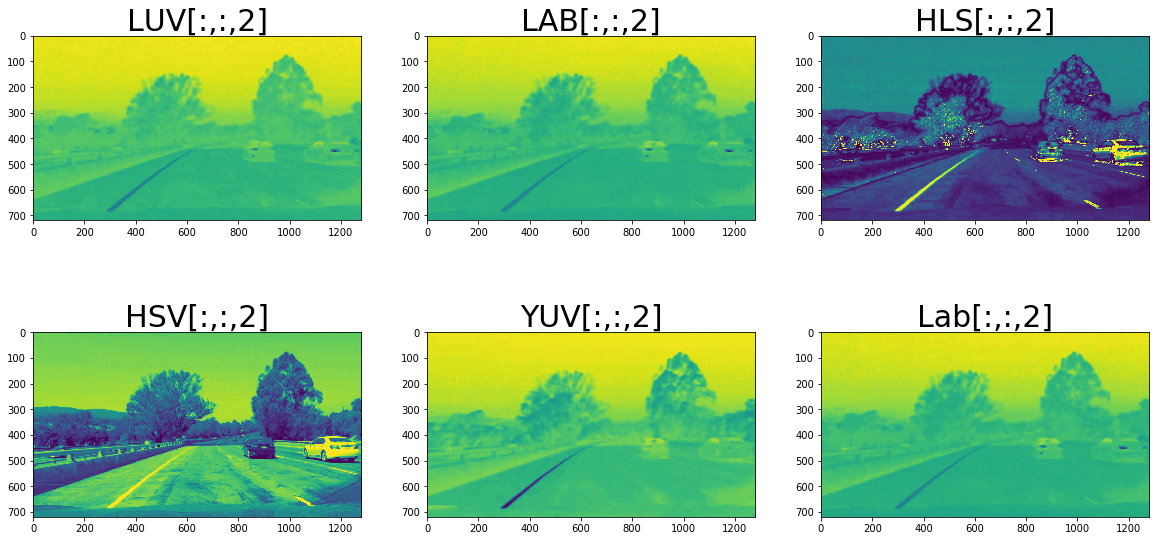

In [88]:
LUV = cv2.cvtColor(image, cv2.COLOR_BGR2LUV)
LAB = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
HLS = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV_FULL)
YUV = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
Lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

for channel in range(3):

    f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20,10))
    ax1.imshow(LUV[:,:,channel])
    ax1.set_title('LUV[:,:,'+str(channel)+']', fontsize=30)
    ax2.imshow(LAB[:,:,channel])
    ax2.set_title('LAB[:,:,'+str(channel)+']', fontsize=30)
    ax3.imshow(HLS[:,:,channel])
    ax3.set_title('HLS[:,:,'+str(channel)+']', fontsize=30)
    ax4.imshow(HSV[:,:,channel])
    ax4.set_title('HSV[:,:,'+str(channel)+']', fontsize=30)
    ax5.imshow(YUV[:,:,channel])
    ax5.set_title('YUV[:,:,'+str(channel)+']', fontsize=30)
    ax6.imshow(Lab[:,:,channel])
    ax6.set_title('Lab[:,:,'+str(channel)+']', fontsize=30)



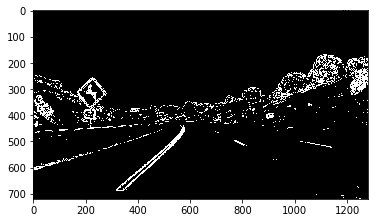

In [31]:
%matplotlib inline
# Load image
image = cv2.imread('../test_images/test2.jpg')

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Extract the Saturation channel
s_channel = hls_select(image)

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(s_channel, orient='x', sobel_kernel=ksize, thresh=(20, 255))
grady = abs_sobel_thresh(s_channel, orient='y', sobel_kernel=ksize, thresh=(15, 255))
# After much trial and error, I determined 20 and 120 to be really good thresholds.
mag_binary = mag_thresh(s_channel, sobel_kernel=ksize, thresh=(20, 120))

combined = np.zeros_like(mag_binary)
combined[(gradx == 1) | ((grady == 1) & (mag_binary == 1))] = 1
plt.imshow(combined, cmap='gray')
plt.show()

## Figuring out optimal threshold values
I used the below cell to figure out what some good parameters are for thresholding.

In [ ]:
s_channel1 = hls_select(image, (lower_bound, upper_bound))
s_channel2 = hls_select(image)

In [89]:
from matplotlib.widgets import Slider, Button, RadioButtons
%matplotlib

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)

lower_bound = 0
upper_bound = 120
lower_boundr = 0
upper_boundr = np.pi*2

image = cv2.imread('../test_images/test4.jpg') 

# This first binary is just for the initialization.  It isn't used in the tool anymore.
channel_thresholded = hls_select(image, (lower_bound, upper_bound))

# This one is the basis for all the transforms.
channel = hls_select(image)


l = plt.imshow(channel_thresholded, cmap='gray')
#plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axlow = plt.axes([0.25, 0.0, 0.65, 0.03], facecolor=axcolor)
axhigh = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor=axcolor)
axlowr = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axhighr = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

# TODO: Make sure these sliders maintian the right inequality.
current_low = Slider(axlow, 'Lower bound', 0, 255, valinit=lower_bound)
current_high = Slider(axhigh, 'Upper bound', 0, 255, valinit=upper_bound)

current_low_rads = Slider(axlowr, 'Lower bound radians', 0, np.pi*2, valinit=lower_boundr)
current_high_rads = Slider(axhighr, 'Upper bound radians', 0, np.pi*2, valinit=upper_boundr)


def update(val):
    if radio.value_selected == 'dir_threshold':
        low = current_low_rads.val
        high = current_high_rads.val
    else:
        low = current_low.val
        high = current_high.val
    
    # Apply the threshhold that is selected
    if radio.value_selected == 'abs_sobel_thresh' and \
        derivative.value_selected == 'dy/dx':
        updated_image = globals()[radio.value_selected](channel,
                                                        orient='y',
                                                        thresh=(low, high))
    else:
        updated_image = globals()[radio.value_selected](channel, thresh=(low, high))
    
    l.set_data(updated_image)
    fig.canvas.draw_idle()
    
current_low.on_changed(update)
current_high.on_changed(update)
current_low_rads.on_changed(update)
current_high_rads.on_changed(update)

rax = plt.axes([0.025, 0.3, 0.15, 0.15], facecolor=axcolor)
dax = plt.axes([0.025, 0.6, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('abs_sobel_thresh', 'mag_thresh', 'dir_threshold'), active=0)
derivative = RadioButtons(dax, ('dx/dy', 'dy/dx'), active=0)    
radio.on_clicked(update)
derivative.on_clicked(update)


plt.show()

Using matplotlib backend: Qt4Agg
